Dataset Preview:


,Timestamp,Flow Rate (L/min),Pressure (PSI),Water Level (%),Leak Status,Action Taken
0,2024-12-01 00:00:00,11.49,63.99,64.87,0,NaN
1,2024-12-01 00:05:00,9.59,59.25,72.83,1,Alerted
2,2024-12-01 00:10:00,11.94,50.60,63.11,0,NaN
3,2024-12-01 00:15:00,14.57,43.53,70.38,1,Alerted
4,2024-12-01 00:20:00,9.30,56.98,46.60,0,NaN



Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Timestamp          1000 non-null   object 
 1   Flow Rate (L/min)  1000 non-null   float64
 2   Pressure (PSI)     1000 non-null   float64
 3   Water Level (%)    1000 non-null   float64
 4   Leak Status        1000 non-null   int64  
 5   Action Taken       47 non-null     object 
dtypes: float64(3), int64(1), object(2)
memory usage: 47.0+ KB

Dataset Statistics:
       Flow Rate (L/min)  Pressure (PSI)  Water Level (%)  Leak Status
count        1000.000000      1000.00000      1000.000000  1000.000000
mean           10.058060        50.70513        74.790030     0.047000
std             2.937731         9.96458        14.091967     0.211745
min             0.280000        20.60000        29.710000     0.000000
25%             8.057500        43.93500        65.282500  

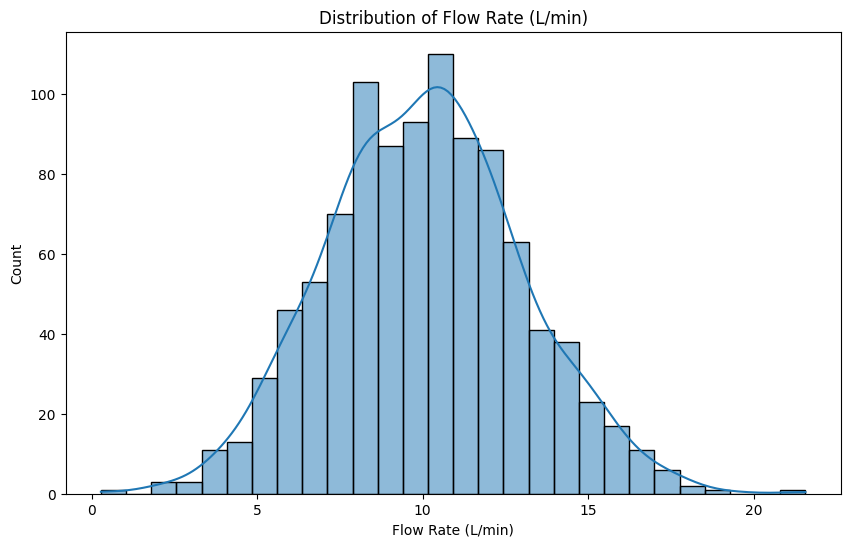

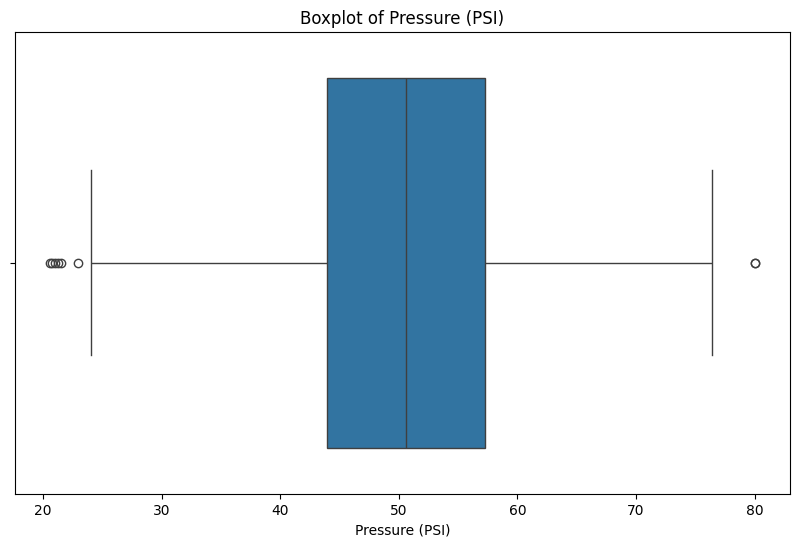

Cleaned dataset saved to: ../data/cleaned_dataset.csv


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data_path = "../data/Smart_Water_Management_Dataset.csv"
df = pd.read_csv(data_path)

# Display the first few rows of the dataset
print("Dataset Preview:")
display(df.head())

# Check basic info and statistics
print("\nBasic Info:")
df.info()

print("\nDataset Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Visualize distributions
plt.figure(figsize=(10, 6))
sns.histplot(df["Flow Rate (L/min)"], kde=True)
plt.title("Distribution of Flow Rate (L/min)")
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=df["Pressure (PSI)"])
plt.title("Boxplot of Pressure (PSI)")
plt.show()

# Handle outliers (example: Flow Rate)
q1 = df["Flow Rate (L/min)"].quantile(0.25)
q3 = df["Flow Rate (L/min)"].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

df["Flow Rate (L/min)"] = np.clip(df["Flow Rate (L/min)"], lower_bound, upper_bound)

# Feature Engineering (example: Day of the Week from Timestamp)
df["Timestamp"] = pd.to_datetime(df["Timestamp"])
df["Day of Week"] = df["Timestamp"].dt.day_name()

# Drop unnecessary columns
df = df.drop(columns=["Timestamp"])

# Encode categorical features (if necessary)
df = pd.get_dummies(df, columns=["Action Taken"], drop_first=True)

# Normalize/Scale numerical features
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_features = ["Flow Rate (L/min)", "Pressure (PSI)", "Water Level (%)"]
df[num_features] = scaler.fit_transform(df[num_features])

# Save the cleaned dataset
cleaned_data_path = "../data/cleaned_dataset.csv"
df.to_csv(cleaned_data_path, index=False)
print(f"Cleaned dataset saved to: {cleaned_data_path}")
